In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
# Create TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [25]:
wine = load_wine()
X, y = wine.data, wine.target

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4065 (15.88 KB)
Trainable params: 4065 (15.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train_standardized, y_train, epochs=20, batch_size=32, validation_data=(X_test_standardized, y_test), callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 2s 88ms/step - loss: 0.5014 - accuracy: 0.5000 - val_loss: 0.4363 - val_accuracy: 0.5741
Epoch 2/20
4/4 [==============================] - 0s 19ms/step - loss: 0.3105 - accuracy: 0.5968 - val_loss: 0.2766 - val_accuracy: 0.6481
Epoch 3/20
4/4 [==============================] - 0s 23ms/step - loss: 0.1512 - accuracy: 0.6371 - val_loss: 0.1228 - val_accuracy: 0.6481
Epoch 4/20
4/4 [==============================] - 0s 16ms/step - loss: -0.0069 - accuracy: 0.6452 - val_loss: -0.0354 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 18ms/step - loss: -0.1880 - accuracy: 0.6452 - val_loss: -0.2081 - val_accuracy: 0.6852
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: -0.3664 - accuracy: 0.6855 - val_loss: -0.4074 - val_accuracy: 0.6852
Epoch 7/20
4/4 [==============================] - 0s 16ms/step - loss: -0.6035 - accuracy: 0.6935 - val_loss: -0.6327 - val_accuracy: 0.6852
Epoch 8/20
4/4 [===

In [58]:
model.save('model_wine.h5')

/home/rendika/Documents/code/AI/tugas/tensortgs/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
# Load the saved model
load_model = tf.keras.models.load_model('model_wine.h5')

In [60]:
test_loss, test_acc = load_model.evaluate(X_test_standardized, y_test)
print(f'Test accuracy: {test_acc}')

2/2 [==============================] - 0s 4ms/step - loss: -12.0768 - accuracy: 0.7037
Test accuracy: 0.7037037014961243


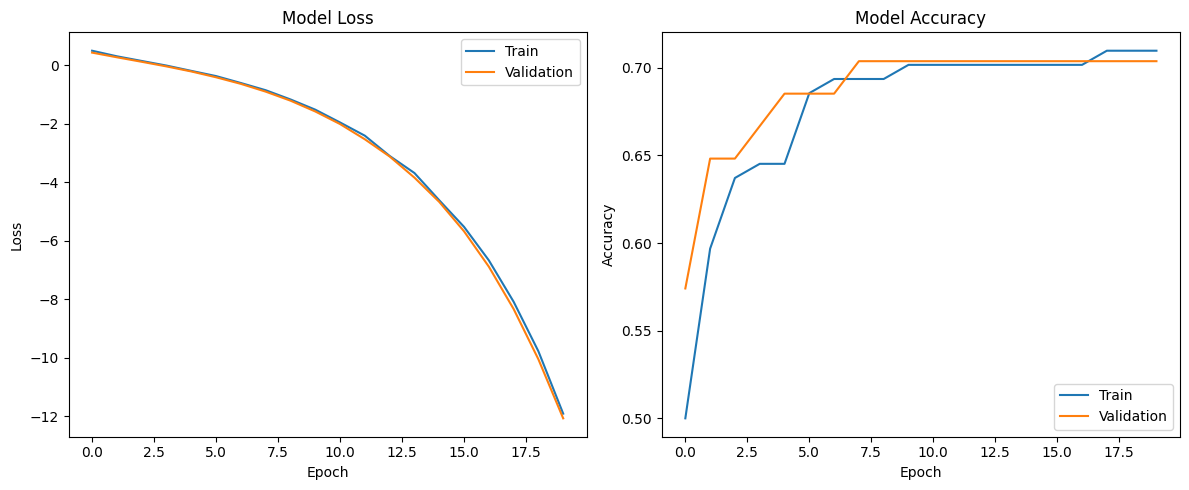

In [73]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('training_plot.png')

In [63]:
# Assuming X is your feature matrix and y is your target variable
num_features = X.shape[1]  # Number of columns in X (assuming features are in columns)
num_labels = np.unique(y).shape[0]  # Number of unique labels in y

print("Number of features:", num_features)
print("Number of labels:", num_labels)

Number of features: 13
Number of labels: 3


In [64]:
total_weights = model.count_params()
print(total_weights)

4065
